### Match traj to hex

In [1]:
from fmm import H3MM,hexs2wkt

In [2]:
traj = "LINESTRING (18.024101257324215 59.337523121884225, 18.03852081298828 59.34391321930451, 18.042125701904297 59.35353986273416, 18.056459426879883 59.36080179623859, 18.065214157104492 59.34964577662557)"

In [3]:
hex_level = 9
interpolate = False
result = H3MM.match_wkt(traj, hex_level, interpolate)

In [4]:
print(result.traj_id)
print(list(result.hexs))
print(hexs2wkt(result.hexs))

0
[617143120668917759, 617143120671277055, 617143120852942847, 617143120855302143, 617143120799465471]
MULTIPOLYGON(((18.0211916733 59.3369815178,18.0212055052 59.3355269148,18.0240881588 59.3348632699,18.0269570804 59.3356541999,18.0269434066 59.3371088063,18.0240606532 59.3377724792,18.0211916733 59.3369815178)),((18.0355106845 59.3438444663,18.0355241243 59.3423900552,18.0384070386 59.3417261983,18.0412766128 59.3425167245,18.0412633312 59.3439711389,18.0383803171 59.3446350238,18.0355106845 59.3438444663)),((18.0382867688 59.3548145103,18.038300135 59.3533604315,18.0411836259 59.3526966904,18.0440538504 59.353487,18.0440406424 59.3549410822,18.0411570517 59.3556048513,18.0382867688 59.3548145103)),((18.052613227 59.3616733077,18.0526262008 59.3602194209,18.0555099521 59.3595554677,18.0583808293 59.3603453732,18.0583680137 59.3617992633,18.0554841627 59.3624632446,18.052613227 59.3616733077)),((18.0613409429 59.3509568719,18.061353674 59.349502646,18.0642367705 59.3488383211,18.0671

### Plot result

In [5]:
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib
from shapely import wkt

In [6]:
def plot_traj_hex(traj_geom, hex_geom, margin = 0.01):
    fig,ax = plt.subplots(1,1,figsize=(6,4))
    patches = []
    tc = "C1"
    hc = "C4"
    x,y = traj_geom.xy
    ax.plot(x,y,c=tc,marker="o",ms=6,lw=2,markeredgewidth=4, markeredgecolor=tc)
    for geom in hex_geom.geoms:
        x,y = geom.exterior.xy
        ax.fill(x, y, fc = hc, ec="w",linewidth=2, alpha = 0.8)
    ax.tick_params(axis='both',left=False, top=False, right=False, bottom=False, 
                   labelleft=False, labeltop=False, labelright=False, labelbottom=False)
    minx, miny, maxx, maxy = traj_geom.envelope.buffer(margin).bounds
    ax.set_xlim(minx,maxx)
    ax.set_ylim(miny,maxy)
#     ax.set_aspect(1.0)
    return fig,ax

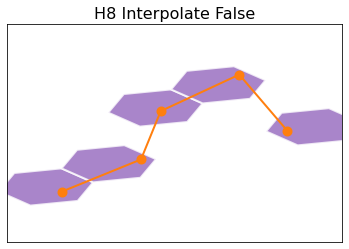

In [7]:
level = 8
interpolate = False
result = H3MM.match_wkt(traj, level, interpolate)
traj_geom = wkt.loads(traj)
hex_geom = wkt.loads(hexs2wkt(result.hexs))
fig,ax = plot_traj_hex(traj_geom,hex_geom)
# plt.tight_layout()
ax.set_title("H{} Interpolate {}".format(level,interpolate),fontsize=16)
fig.savefig("h{}{}.png".format(level,("","i")[interpolate]),dpi=300,bbox_inches='tight',pad_inches=0)

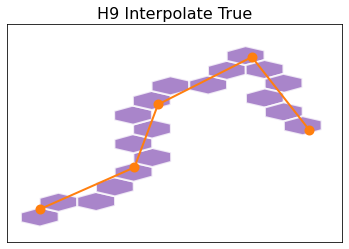

In [8]:
level = 9
interpolate = True
result = H3MM.match_wkt(traj, level, interpolate)
traj_geom = wkt.loads(traj)
hex_geom = wkt.loads(hexs2wkt(result.hexs))
fig,ax = plot_traj_hex(traj_geom,hex_geom,margin=0.005)
ax.set_title("H{} Interpolate {}".format(level,interpolate),fontsize=16)
fig.savefig("h{}{}.png".format(level,("","i")[interpolate]),dpi=300,bbox_inches='tight',pad_inches=0)

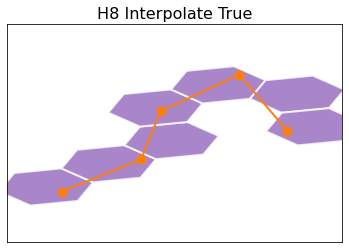

In [9]:
level = 8
interpolate = True
result = H3MM.match_wkt(traj, level, interpolate)
traj_geom = wkt.loads(traj)
hex_geom = wkt.loads(hexs2wkt(result.hexs))
fig,ax = plot_traj_hex(traj_geom,hex_geom)
ax.set_title("H{} Interpolate {}".format(level,interpolate),fontsize=16)
fig.savefig("h{}{}.png".format(level,("","i")[interpolate]),dpi=300,bbox_inches='tight',pad_inches=0)

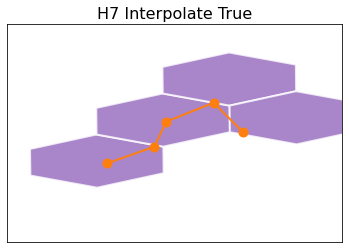

In [10]:
level = 7
interpolate = True
result = H3MM.match_wkt(traj, level, interpolate)
traj_geom = wkt.loads(traj)
hex_geom = wkt.loads(hexs2wkt(result.hexs))
fig,ax = plot_traj_hex(traj_geom,hex_geom,margin=0.03)
ax.set_title("H{} Interpolate {}".format(level,interpolate),fontsize=16)
fig.savefig("h{}{}.png".format(level,("","i")[interpolate]),dpi=300,bbox_inches='tight',pad_inches=0)

### Plot as a whole

In [11]:
levels = [8, 8, 9, 7]
interpolates = [False, True, True, True]

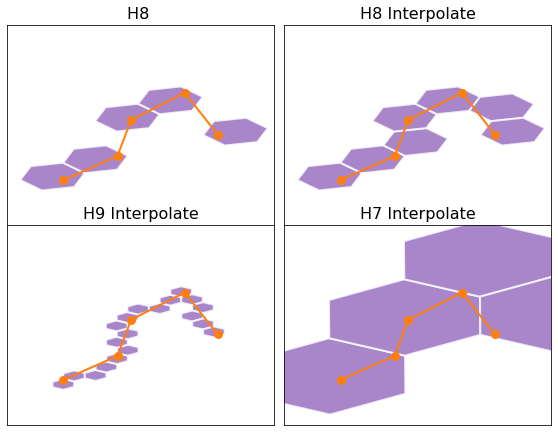

In [12]:
fig,axes = plt.subplots(2,2,figsize=(8,6.1))
patches = []
tc = "C1"
hc = "C4"
for level,interpolate,ax in zip(levels,interpolates,axes.flatten()):
    result = H3MM.match_wkt(traj, level, interpolate)
    traj_geom = wkt.loads(traj)
    hex_geom = wkt.loads(hexs2wkt(result.hexs))
    x,y = traj_geom.xy
    ax.plot(x,y,c=tc,marker="o",ms=5,lw=2,markeredgewidth=4)
    for geom in hex_geom.geoms:
        x,y = geom.exterior.xy
        ax.fill(x, y, fc = hc, ec="w",linewidth=2, alpha = 0.8)
    ax.tick_params(axis='both',left=False, top=False, right=False, bottom=False, 
                   labelleft=False, labeltop=False, labelright=False, labelbottom=False)
    ax.set_aspect(1.0)
    ax.set_title("H{} {}".format(level,("","Interpolate")[interpolate]),position=(0.5, 0.9),fontsize=16)
    minx, miny, maxx, maxy = traj_geom.envelope.buffer(0.015).bounds
    yoffset = 0.003
    ax.set_xlim(minx,maxx)
    ax.set_ylim(miny+yoffset,maxy+yoffset)
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
fig.savefig("h3demo.png",dpi=300,bbox_inches='tight',pad_inches=0)    